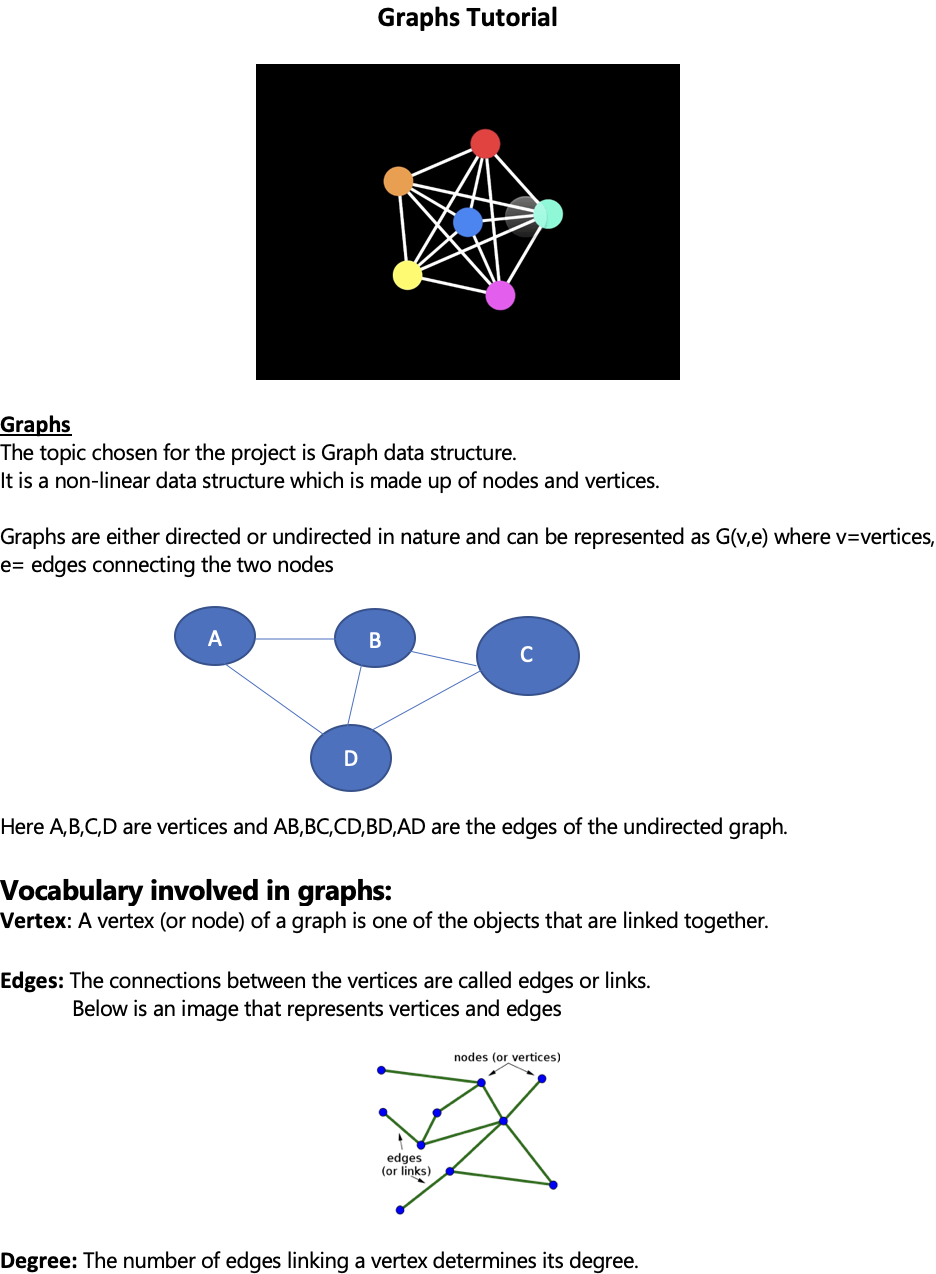

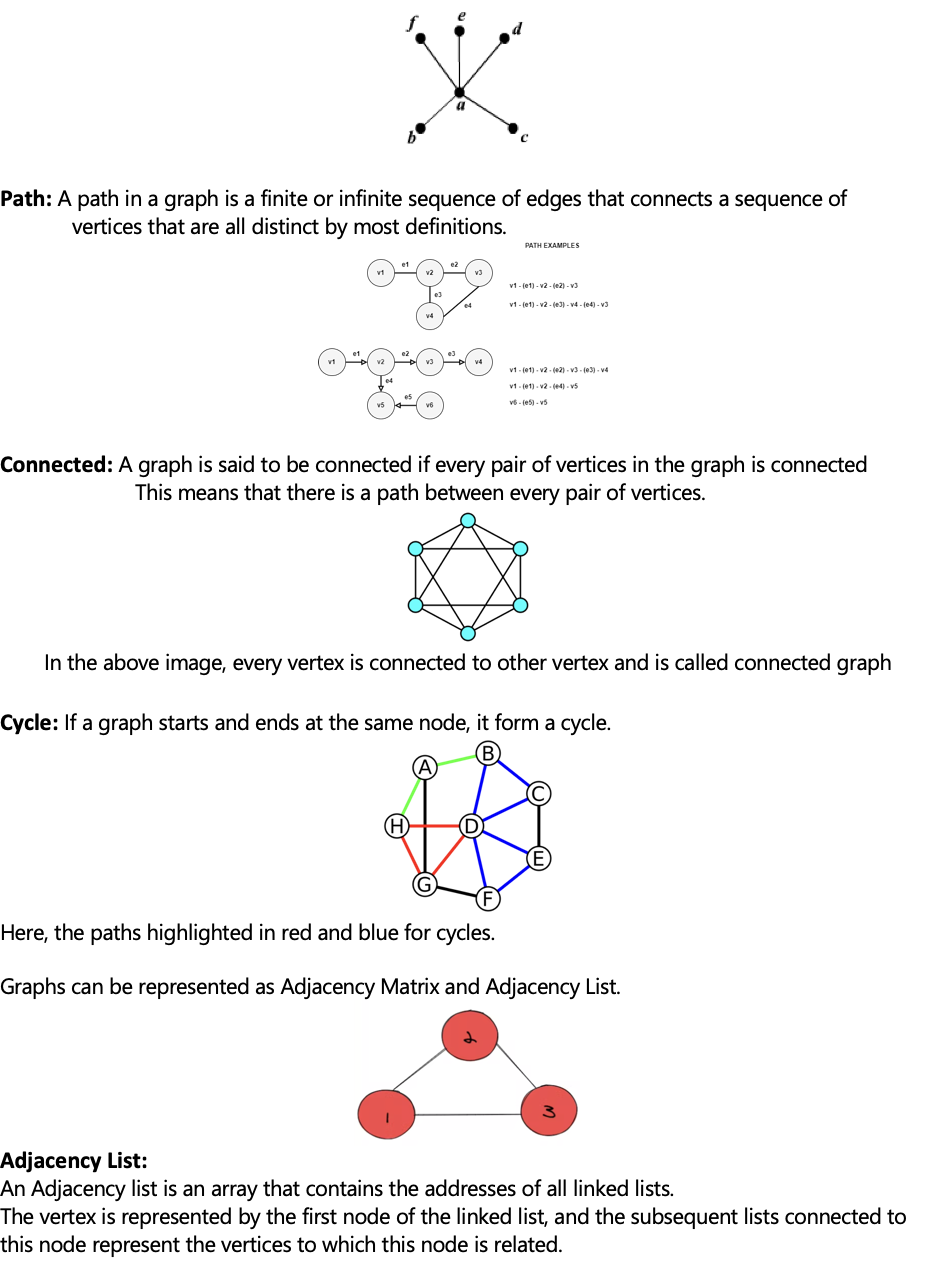

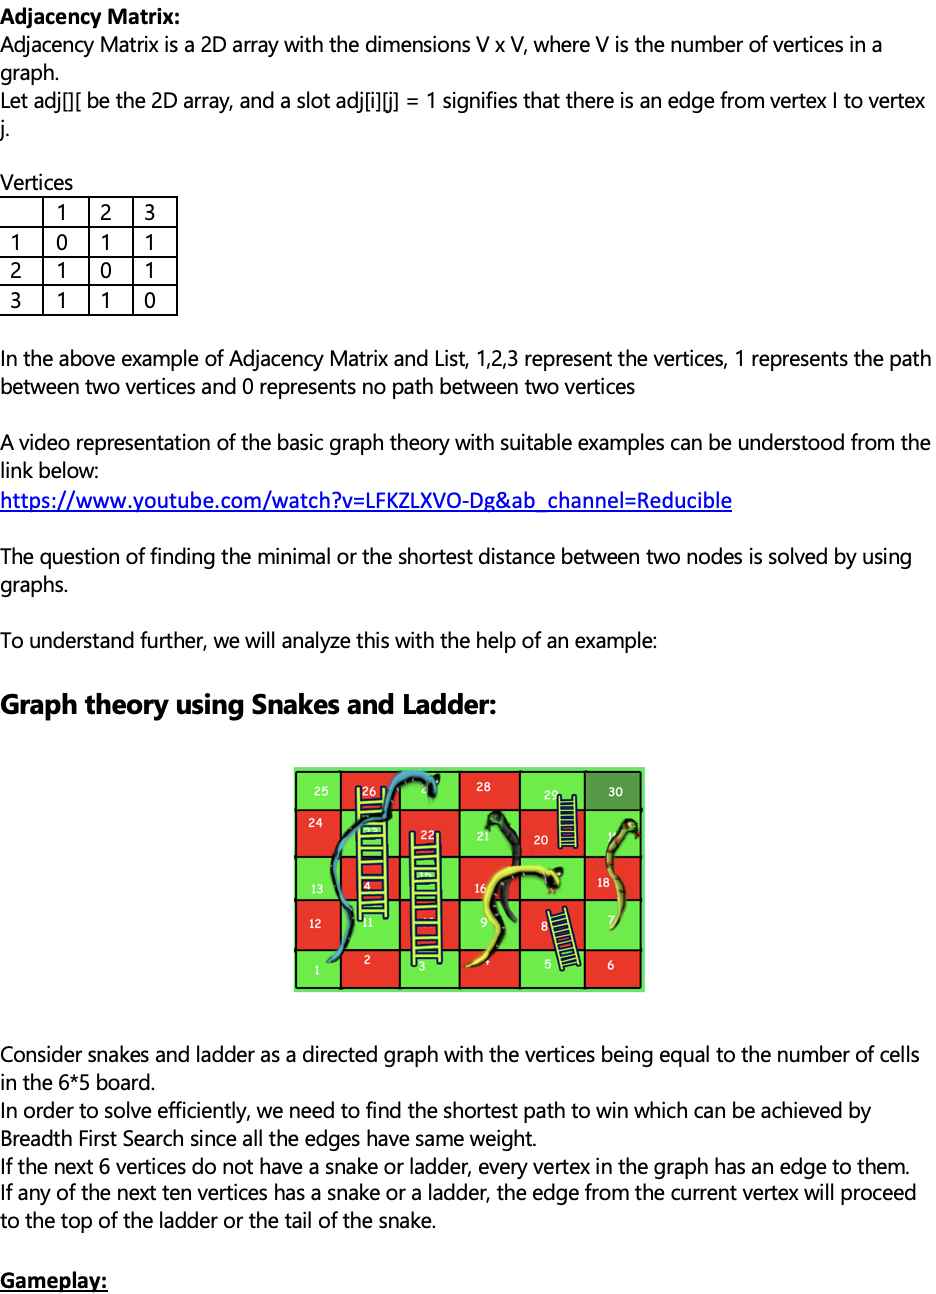

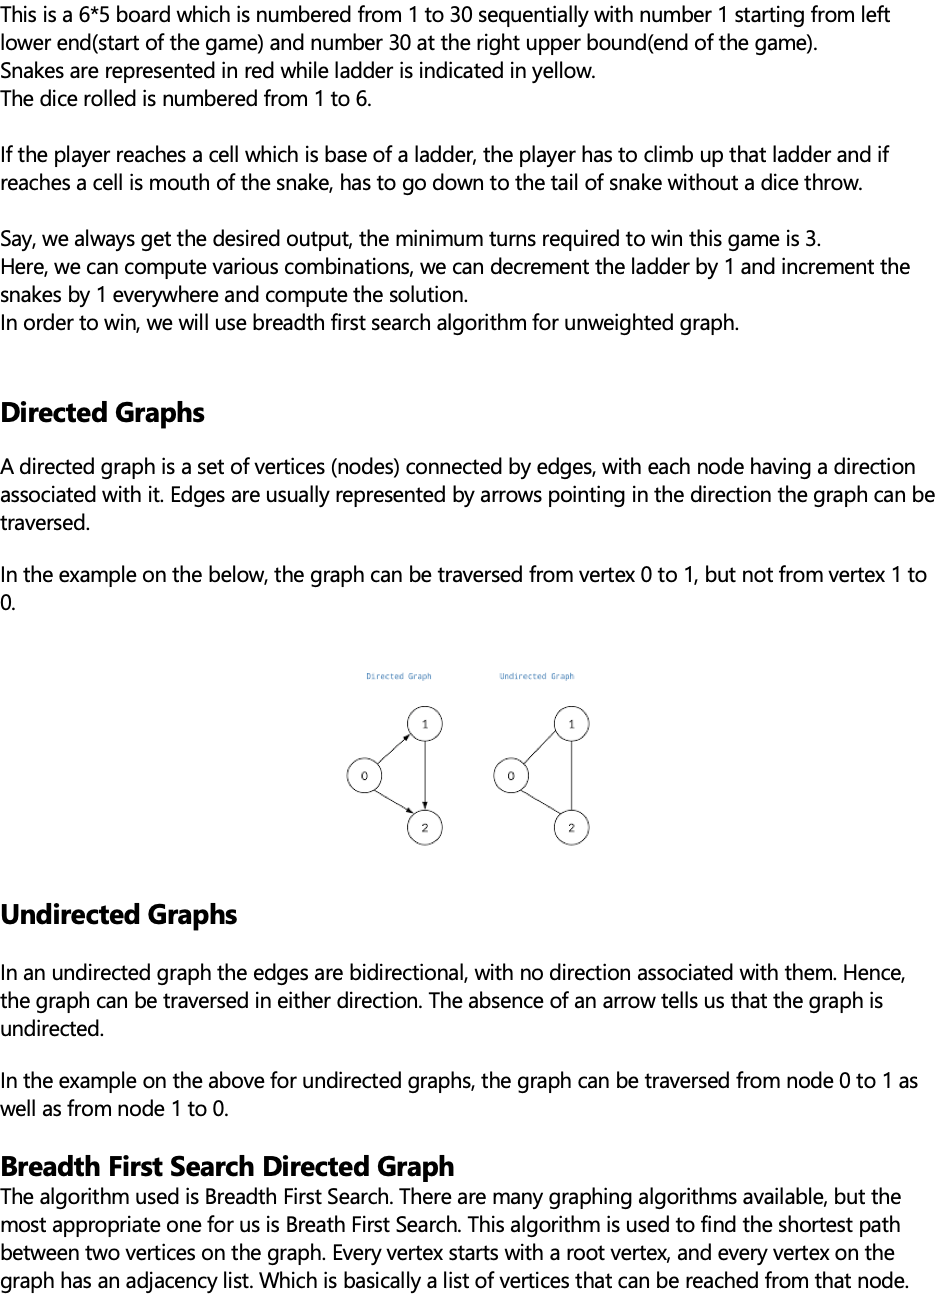

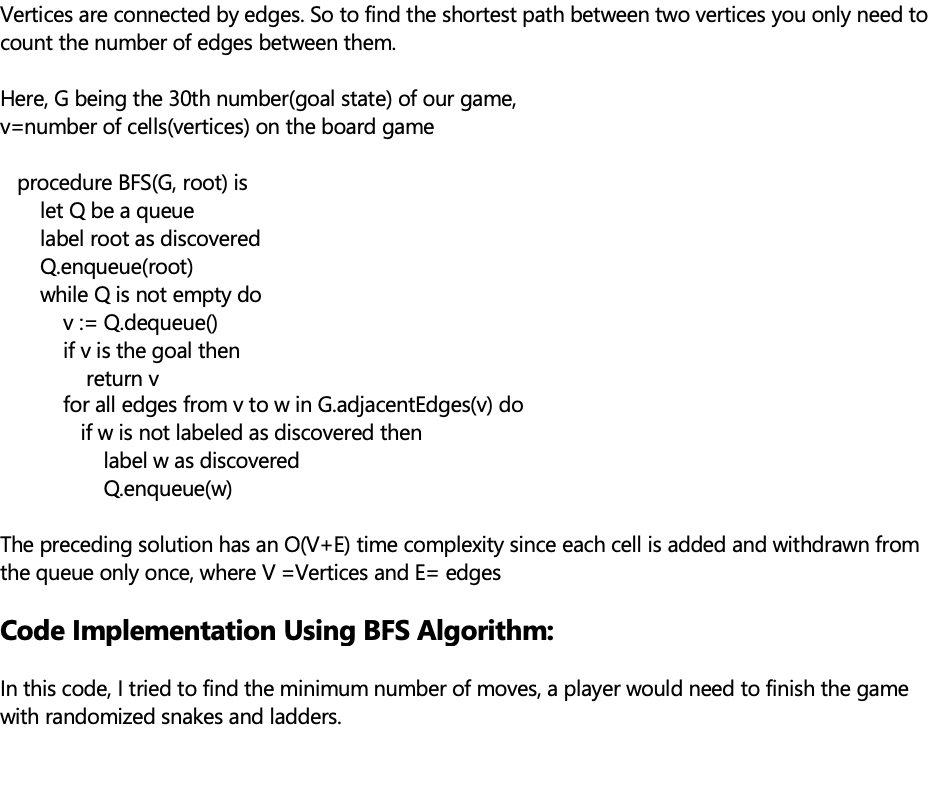

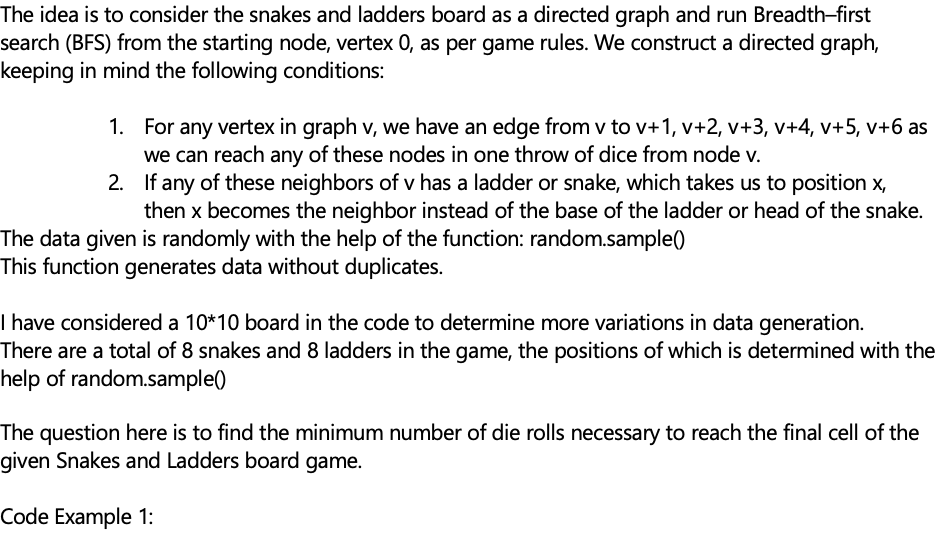

In [2]:
#Author: Miti Shah
from collections import deque
import random
# from numpy.random import randint

#Variable to generate random data without duplicates
#This data will be used to determine the start and end positions of ladder and snake
random = random.sample(range(1,100), 32)

# A class to represent a graph object using bfs
class Graph:
	# Constructor
	def __init__(self, edges, n):

		# A list of lists to represent an adjacency list
		self.adjList = [[] for _ in range(n)]

		# add edges to the graph
		for (src, dest) in edges:
			# Please note that the graph is directed
			self.adjList[src].append(dest)
		# print(self.adjList)


# Perform BFS on graph `g` starting from a given source vertex
def BFS(g, source, n):
	q = deque()

	# to keep track of whether a vertex is found or not
	found = [False] * (n + 1)

	# mark the source vertex as found
	found[source] = True

	# assign the minimum distance of the source vertex as 0 and
	# enqueue it
	q.append((source, 0))

	# loop till queue is empty
	while q:

		# dequeue front node
		vertex, min_dist = q.popleft()

		# `vertex` stores the number associated with the graph node
		# `min_dist` stores the minimum distance of a node from the starting vertex

		# Stop BFS if the last node is reached
		if vertex == n:
			return min_dist

		for u in g.adjList[vertex]:
			if not found[u]:
				# mark it as found and enqueue it
				found[u] = True

				# one more than the minimum distance of the parent node
				q.append((u, min_dist + 1))


def findMinimumMoves(ladder, snake):

	# total number of nodes in the graph
	n = 10 * 10

	# find all edges involved and store them in a list
	edges = []
	for i in range(n):

		j = 1
		while j <= 6 and i + j <= n:
			src = i

			# update destination if there is any ladder
			# or snake from the current position.

			_ladder = ladder.get(i + j) if (ladder.get(i + j)) else 0
			_snake = snake.get(i + j) if (snake.get(i + j)) else 0

			if _ladder or _snake:
				dest = _ladder + _snake
			else:
				dest = i + j

			# add an edge from src to dest
			edges.append((src, dest))

			j = j + 1

	# construct a directed graph
	g = Graph(edges, n)

	# Find the shortest path between 1 and 100 using BFS
	return BFS(g, 0, n)


if __name__ == '__main__':

	# snakes and ladders are represented using a dictionary.
	ladder = {}
	snake = {}
	# used random sample data to generate the positions of ladder
	# insert ladders into the dictionary
	ladder[random[16]] = random[0]
	ladder[random[17]] = random[1]
	ladder[random[18]] = random[2]
	ladder[random[19]] = random[3]
	ladder[random[20]] = random[4]
	ladder[random[21]] = random[5]
	ladder[random[22]] = random[6]
	ladder[random[23]] = random[7]

  # used random sample data to generate the positions of snake
	# insert snakes into the dictionary
	snake[random[24]] = random[8]
	snake[random[25]] = random[9]
	snake[random[26]] = random[10]
	snake[random[27]] = random[11]
	snake[random[28]] = random[12]
	snake[random[29]] = random[13]
	snake[random[30]] = random[14]
	snake[random[31]] = random[15]


print("Ladder positions: ",random[16:23], "Ladder values: ", random[0:7]) 
print("Snake positions: ",random[24:31], "Snake values: ", random[8:15])	
print("Minimum no of moves required to win the match: ", findMinimumMoves(ladder, snake))

Ladder positions:  [37, 80, 51, 18, 75, 62, 43] Ladder values:  [77, 58, 49, 82, 47, 45, 97]
Snake positions:  [67, 39, 99, 96, 11, 8, 65] Snake values:  [25, 55, 60, 84, 73, 71, 30]
Minimum no of moves required to win the match:  6


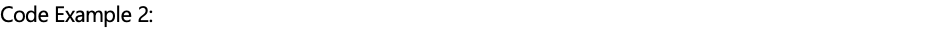

In [4]:
import queue

class Node:
    def __init__(self):
        self.data=None
        self.neighbors=[]

class Graph:
    def __init__(self):
        self.root=None
        self.nodes=[]

    def NodeExists(self, SearchNodeData, SearchNode):
        for x in self.nodes:
            if x.data==SearchNodeData:
                x.neighbors.append(SearchNode)
                return True
        return False

    def getNeighborNodes(self, nodes):
        nodesList = ""
        for x in nodes:
            nodesList += str(x.data + " ")
        return nodesList    

    def buildGraph(self):
        nodesToAdd=queue.Queue()
        rootData = input("Enter root data : ")
        rootNode = Node()
        rootNode.data = rootData
        self.root = rootNode
        nodesToAdd.put(rootNode)

        while not nodesToAdd.empty():
            node = nodesToAdd.get()
            self.nodes.append(node)

            if not node.neighbors:
                neighborCount = int(input("Enter no of neighbors of node {} : ".format(node.data)))
            else:
                nodesList = self.getNeighborNodes(node.neighbors)    
                neighborCount = int(input("Enter no of neighbors of node {} other than node(s) {} : ".format(node.data, nodesList)))
            
            for _ in range(neighborCount):
                neighborData = input("Enter neighbor data : ")
                if not self.NodeExists(neighborData, node):
                    newNode = Node()
                    newNode.data = neighborData
                    newNode.neighbors.append(node)
                    node.neighbors.append(newNode)
                    nodesToAdd.put(newNode)
                    self.nodes.append(newNode)

    def bfs(self):
        root = self.root
        visited,temp = [],queue.Queue()
        temp.put(root)
        print("BFS : ")
        while not temp.empty():
            node = temp.get()
            visited.append(node)
            print(node.data, end=" ")
            for x in node.neighbors:
                if x not in visited:
                    temp.put(x)                

graph = Graph()
graph.buildGraph()
graph.bfs()

Enter root data : 2
Enter no of neighbors of node 2 : 1
Enter neighbor data : 1
Enter no of neighbors of node 1 other than node(s) 2  : 0
BFS : 
2 1 

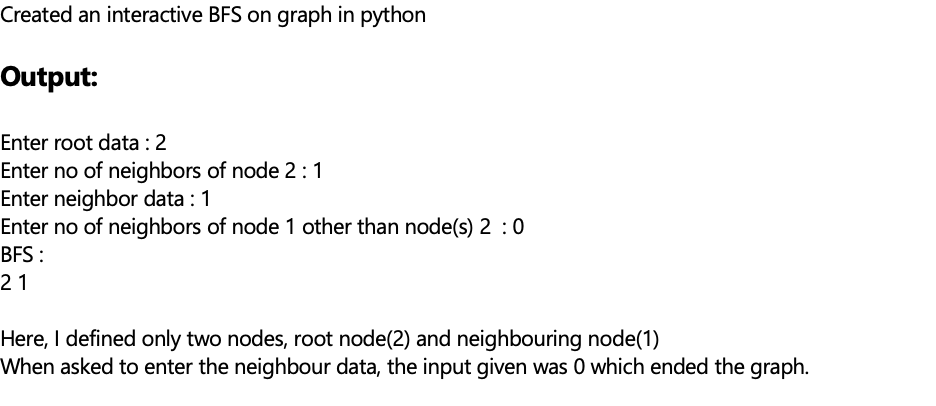

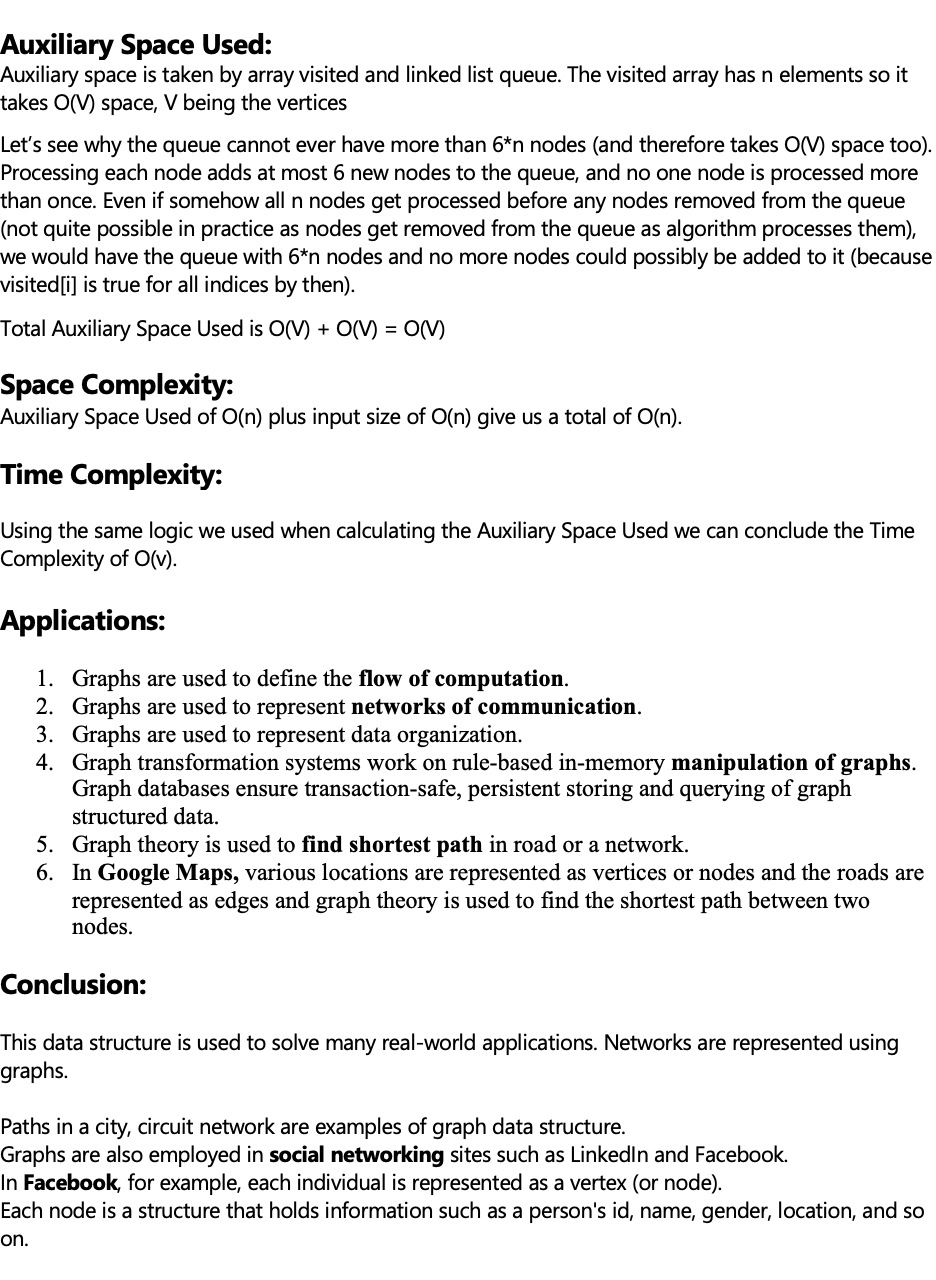

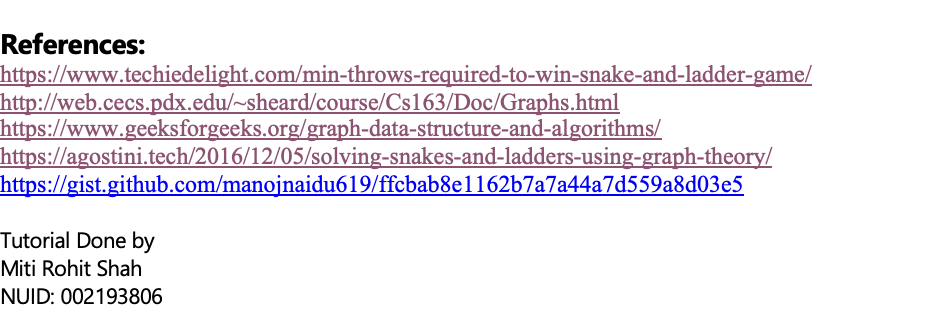